In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

import os
import numpy as np
import pandas as pd
import scipy.signal
import pyabf

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import ipywidgets as widgets
import IPython.display

import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

from colinAnalysis import colinAnalysis

### Load a folder of abf files

In [3]:
#path = '/media/cudmore/data/colin'
path = '/Users/cudmore/data/colin'
ca = colinAnalysis(path)  # load all abf in folder

### Analyze all files in folder (slow because of smoothing)

In [5]:
# read from xls
path = '/media/cudmore/data/colin/cell_db.xls'
path = '/Users/cudmore/data/colin/cell_db.xls'
dfLoaded = pd.read_excel(path, index_col=None, skiprows=1, engine='xlrd')
display(dfLoaded)

,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
0,NaN,21n10003,1,1,m,wt,NaN,83.00,1.312,49.0000,-40,5
1,NaN,21n10007,2,2,m,wt,NaN,83.00,1.312,81.2870,-40,5
2,NaN,21n10008,3,3,m,wt,NaN,83.00,1.312,83.0000,-40,5
3,NaN,21n19004-ko,4,4,f,ko,NaN,112.28,0.000,50.0000,-30,6
4,NaN,21n19006-ko,5,5,f,ko,NaN,195.53,0.000,55.0000,-30,6
5,NaN,21n22000,6,6,m,wt,NaN,93.08,0.000,93.0815,0,40
6,NaN,21n23004-ko,7,7,f,ko,NaN,64.67,0.000,64.6600,0,20


In [6]:
# load and analyze all files (slow)

for fileNum in range(ca.numFiles):
    ca.setAnalysisIdx(fileNum)  # work on one file
    currentFile = ca.currentFile
    currentFile = os.path.splitext(currentFile)[0]
    #print(currentFile)
    detectionDict = ca.getDefaultDetection()
    
    dfRow = dfLoaded[ dfLoaded['File']==currentFile ]
    display(dfRow)
    
    detectionDict['xRange'] = [dfRow['start (sec)'].values[0], dfRow['stop (sec)'].values[0]] 
    detectionDict['genotype'] = dfRow['genotype'].values[0]
    detectionDict['sex'] = dfRow['sex'].values[0]
    
    detectionDict['height'] = dfRow['threshold (pA)'].values[0]  # User specified, CRITICAL
            
    ca.detect(detectionDict)

,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
0,NaN,21n10003,1,1,m,wt,NaN,83.0,1.312,49.0,-40,5


   21n10003.abf Num Sweeps: 1 Recording Dur: 83.0 Peaks within xRange: [1.312, 49.0] to 57 peaks


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
1,NaN,21n10007,2,2,m,wt,NaN,83.0,1.312,81.287,-40,5


   21n10007.abf Num Sweeps: 1 Recording Dur: 83.0 Peaks within xRange: [1.312, 81.287] to 62 peaks


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
2,NaN,21n10008,3,3,m,wt,NaN,83.0,1.312,83.0,-40,5


   21n10008.abf Num Sweeps: 1 Recording Dur: 83.0 Peaks within xRange: [1.312, 83.0] to 80 peaks


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
3,NaN,21n19004-ko,4,4,f,ko,NaN,112.28,0.0,50.0,-30,6


   21n19004-ko.abf Num Sweeps: 1 Recording Dur: 112.28 Peaks within xRange: [0.0, 50.0] to 22 peaks


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
4,NaN,21n19006-ko,5,5,f,ko,NaN,195.53,0.0,55.0,-30,6


   21n19006-ko.abf Num Sweeps: 1 Recording Dur: 195.53 Peaks within xRange: [0.0, 55.0] to 124 peaks


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
5,NaN,21n22000,6,6,m,wt,NaN,93.08,0.0,93.0815,0,40


   21n22000.abf Num Sweeps: 1 Recording Dur: 93.08 Peaks within xRange: [0.0, 93.0815] to 69 peaks


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
6,NaN,21n23004-ko,7,7,f,ko,NaN,64.67,0.0,64.66,0,20


   21n23004-ko.abf Num Sweeps: 1 Recording Dur: 64.67 Peaks within xRange: [0.0, 64.66] to 11 peaks


<IPython.core.display.Javascript object>


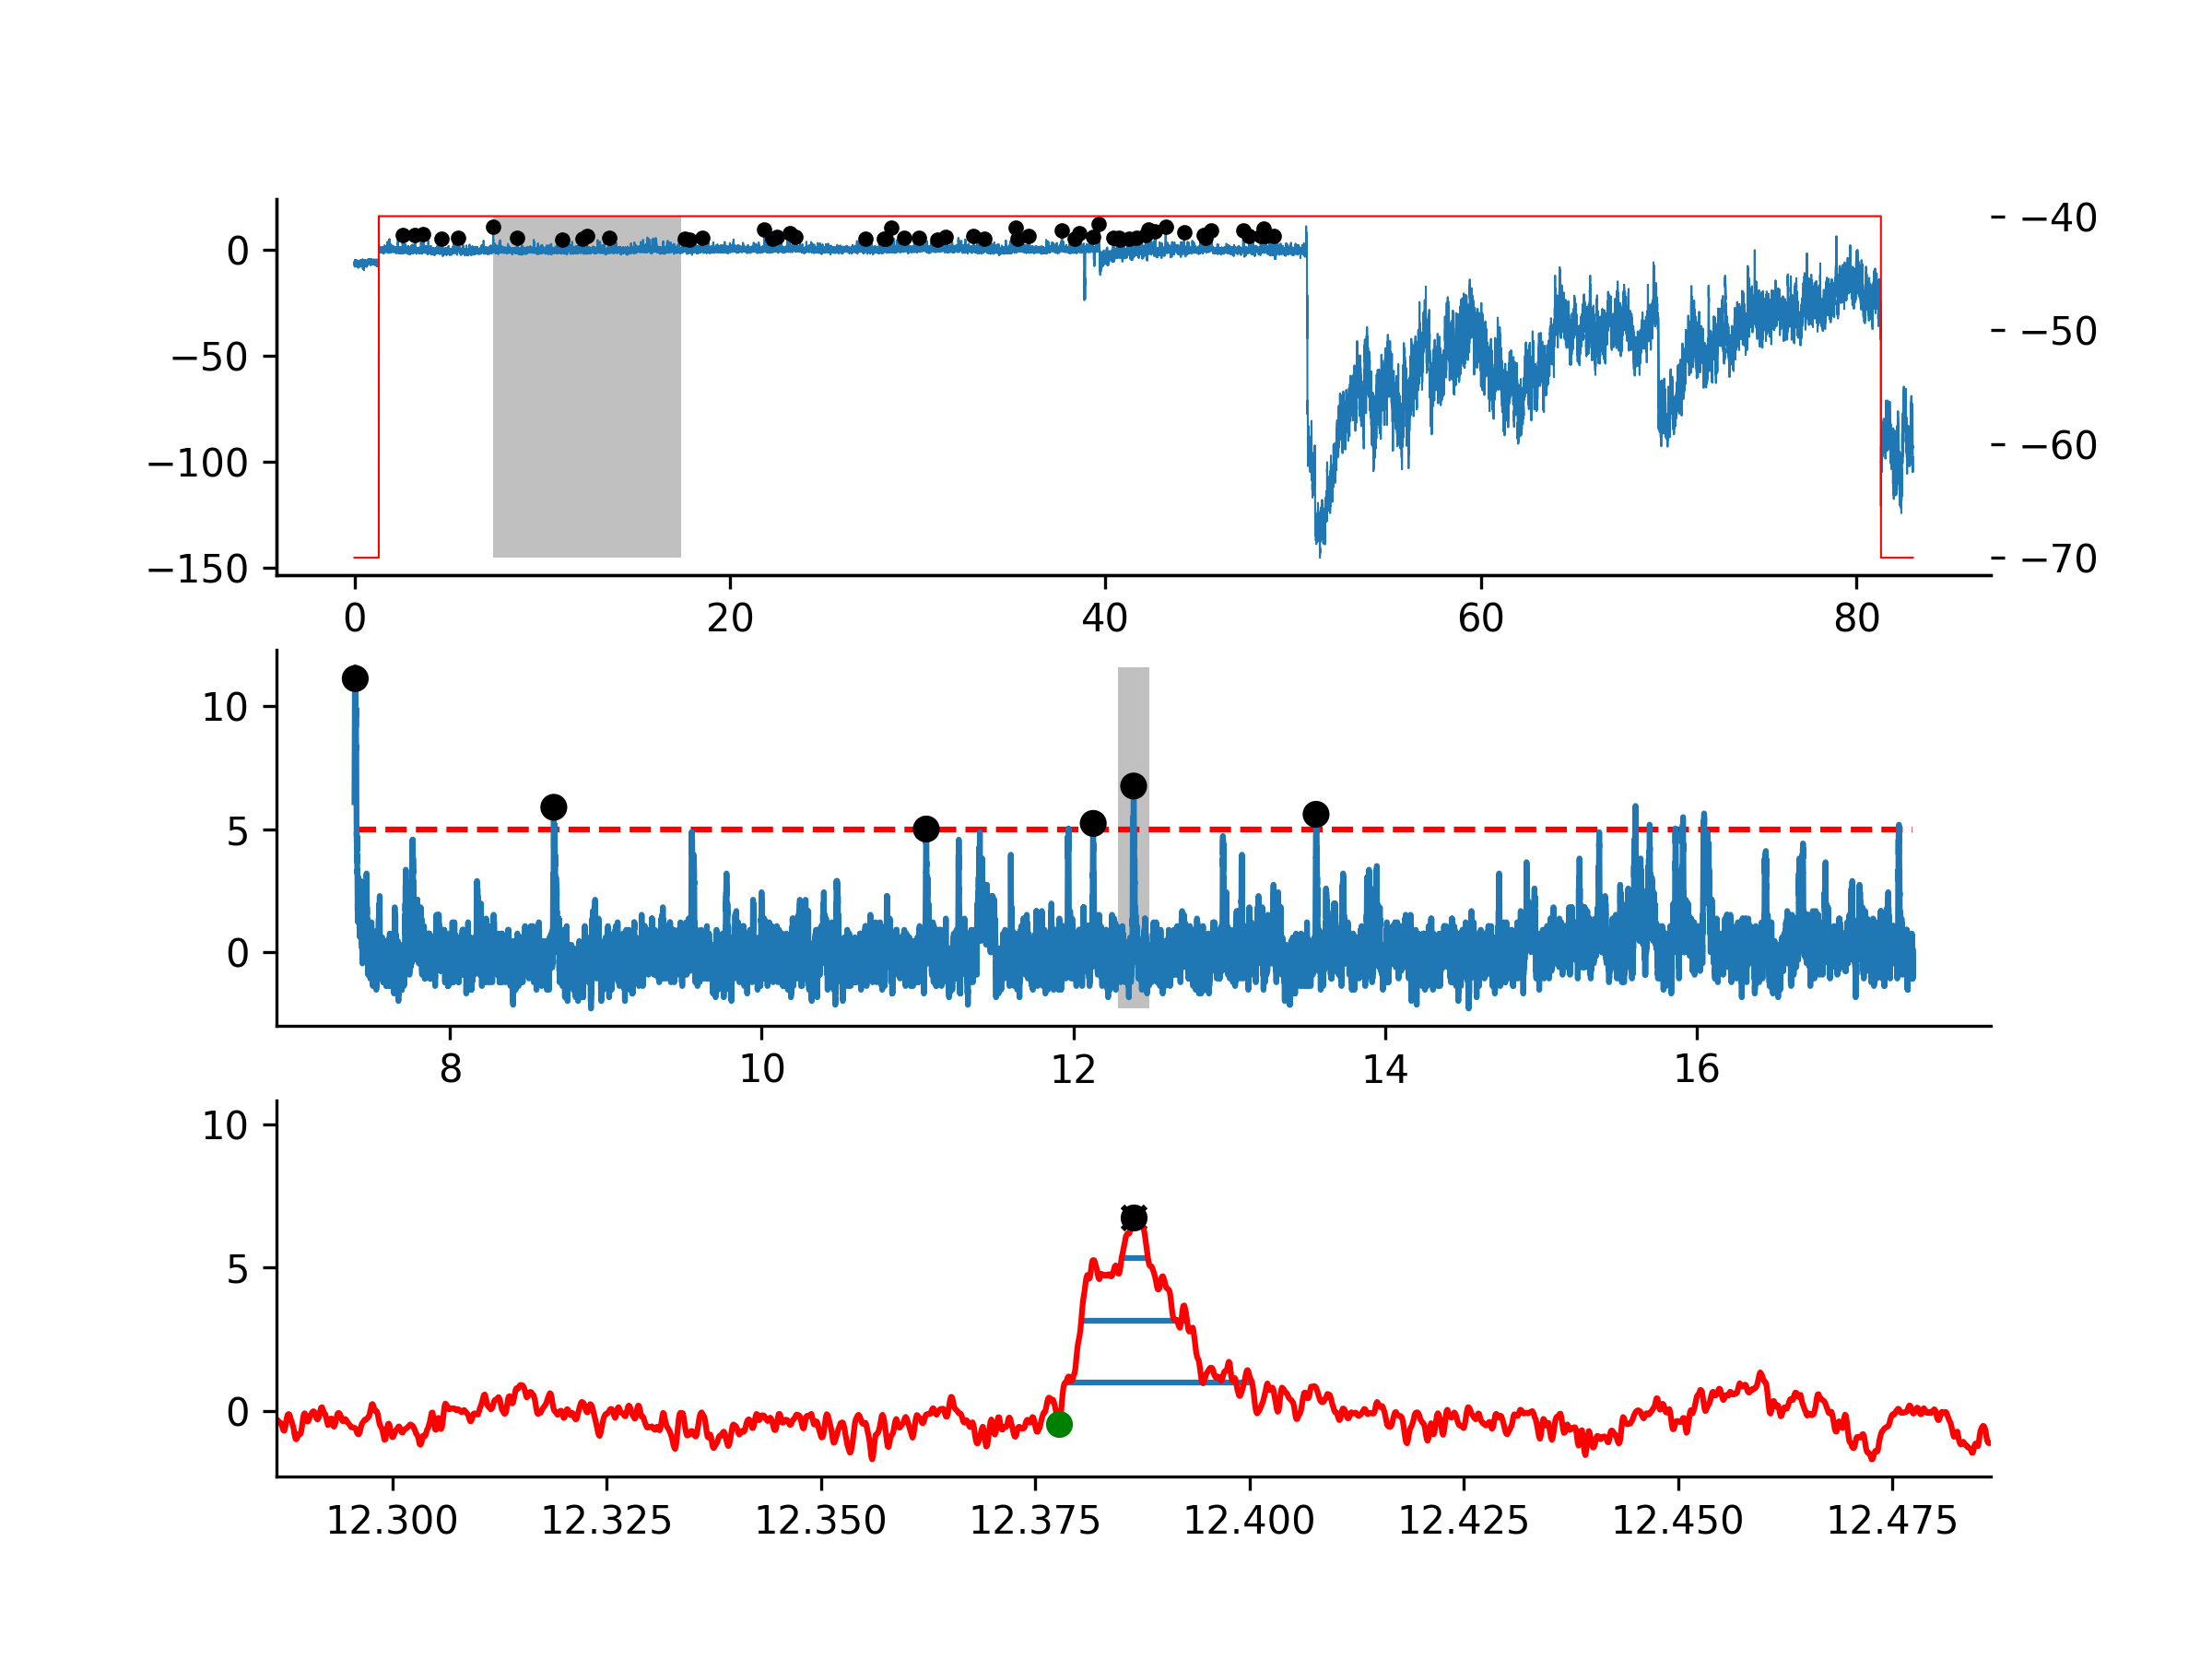

In [7]:
from colinDataBrowser import colinDataBrowser
cdb = colinDataBrowser(ca)

<IPython.core.display.Javascript object>


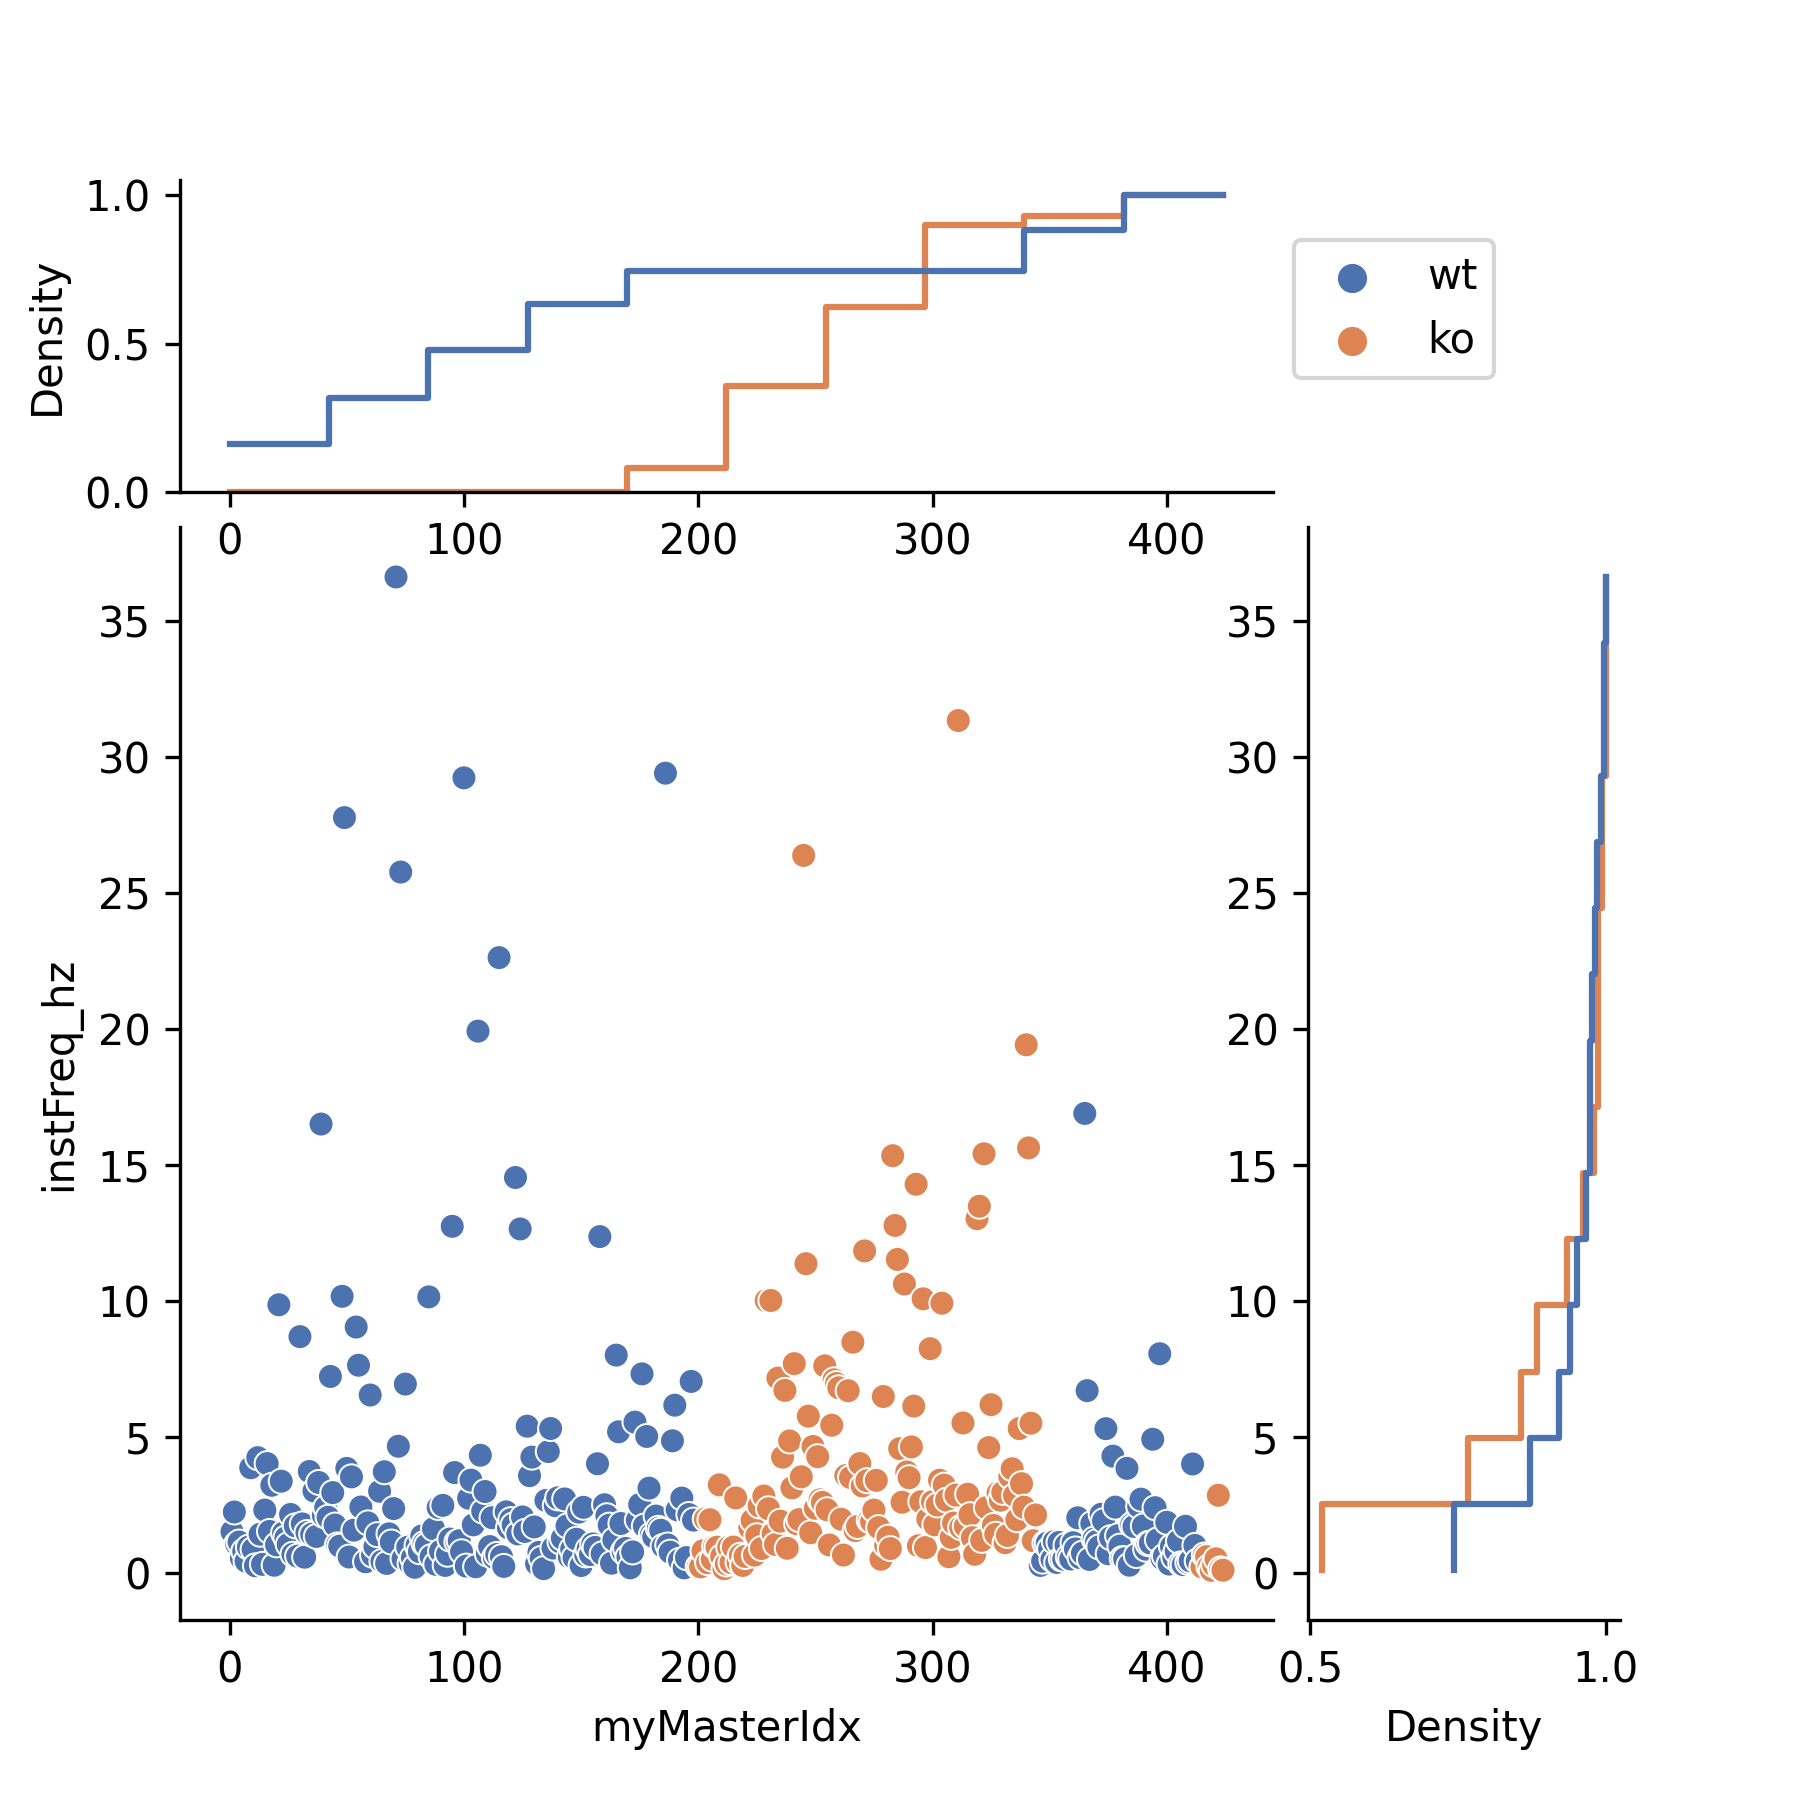

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [8]:
from myScatterWidget import myScatterWidget

# from saved file
#path = '/media/cudmore/data/colin/21n10003_full.csv'
#df = pd.read_csv(path)
#statList = df.columns

# one recording
#df = ca.getDataFrame()
#statList = df.columns

# across all recordings
df = ca.getAllDataFrame()
statList = ca.getStatList()

msw = myScatterWidget(df, statList=statList, hueCols=['genotype', 'sex', 'file', 'myFileIdx', 'DAC0'])


### Preliminary conclusions

1. WT Frequency and Amplitude is higher than KO
2. Kitetics such as Rise Time and Half-Width do not vary between WT and knockout

<IPython.core.display.Javascript object>


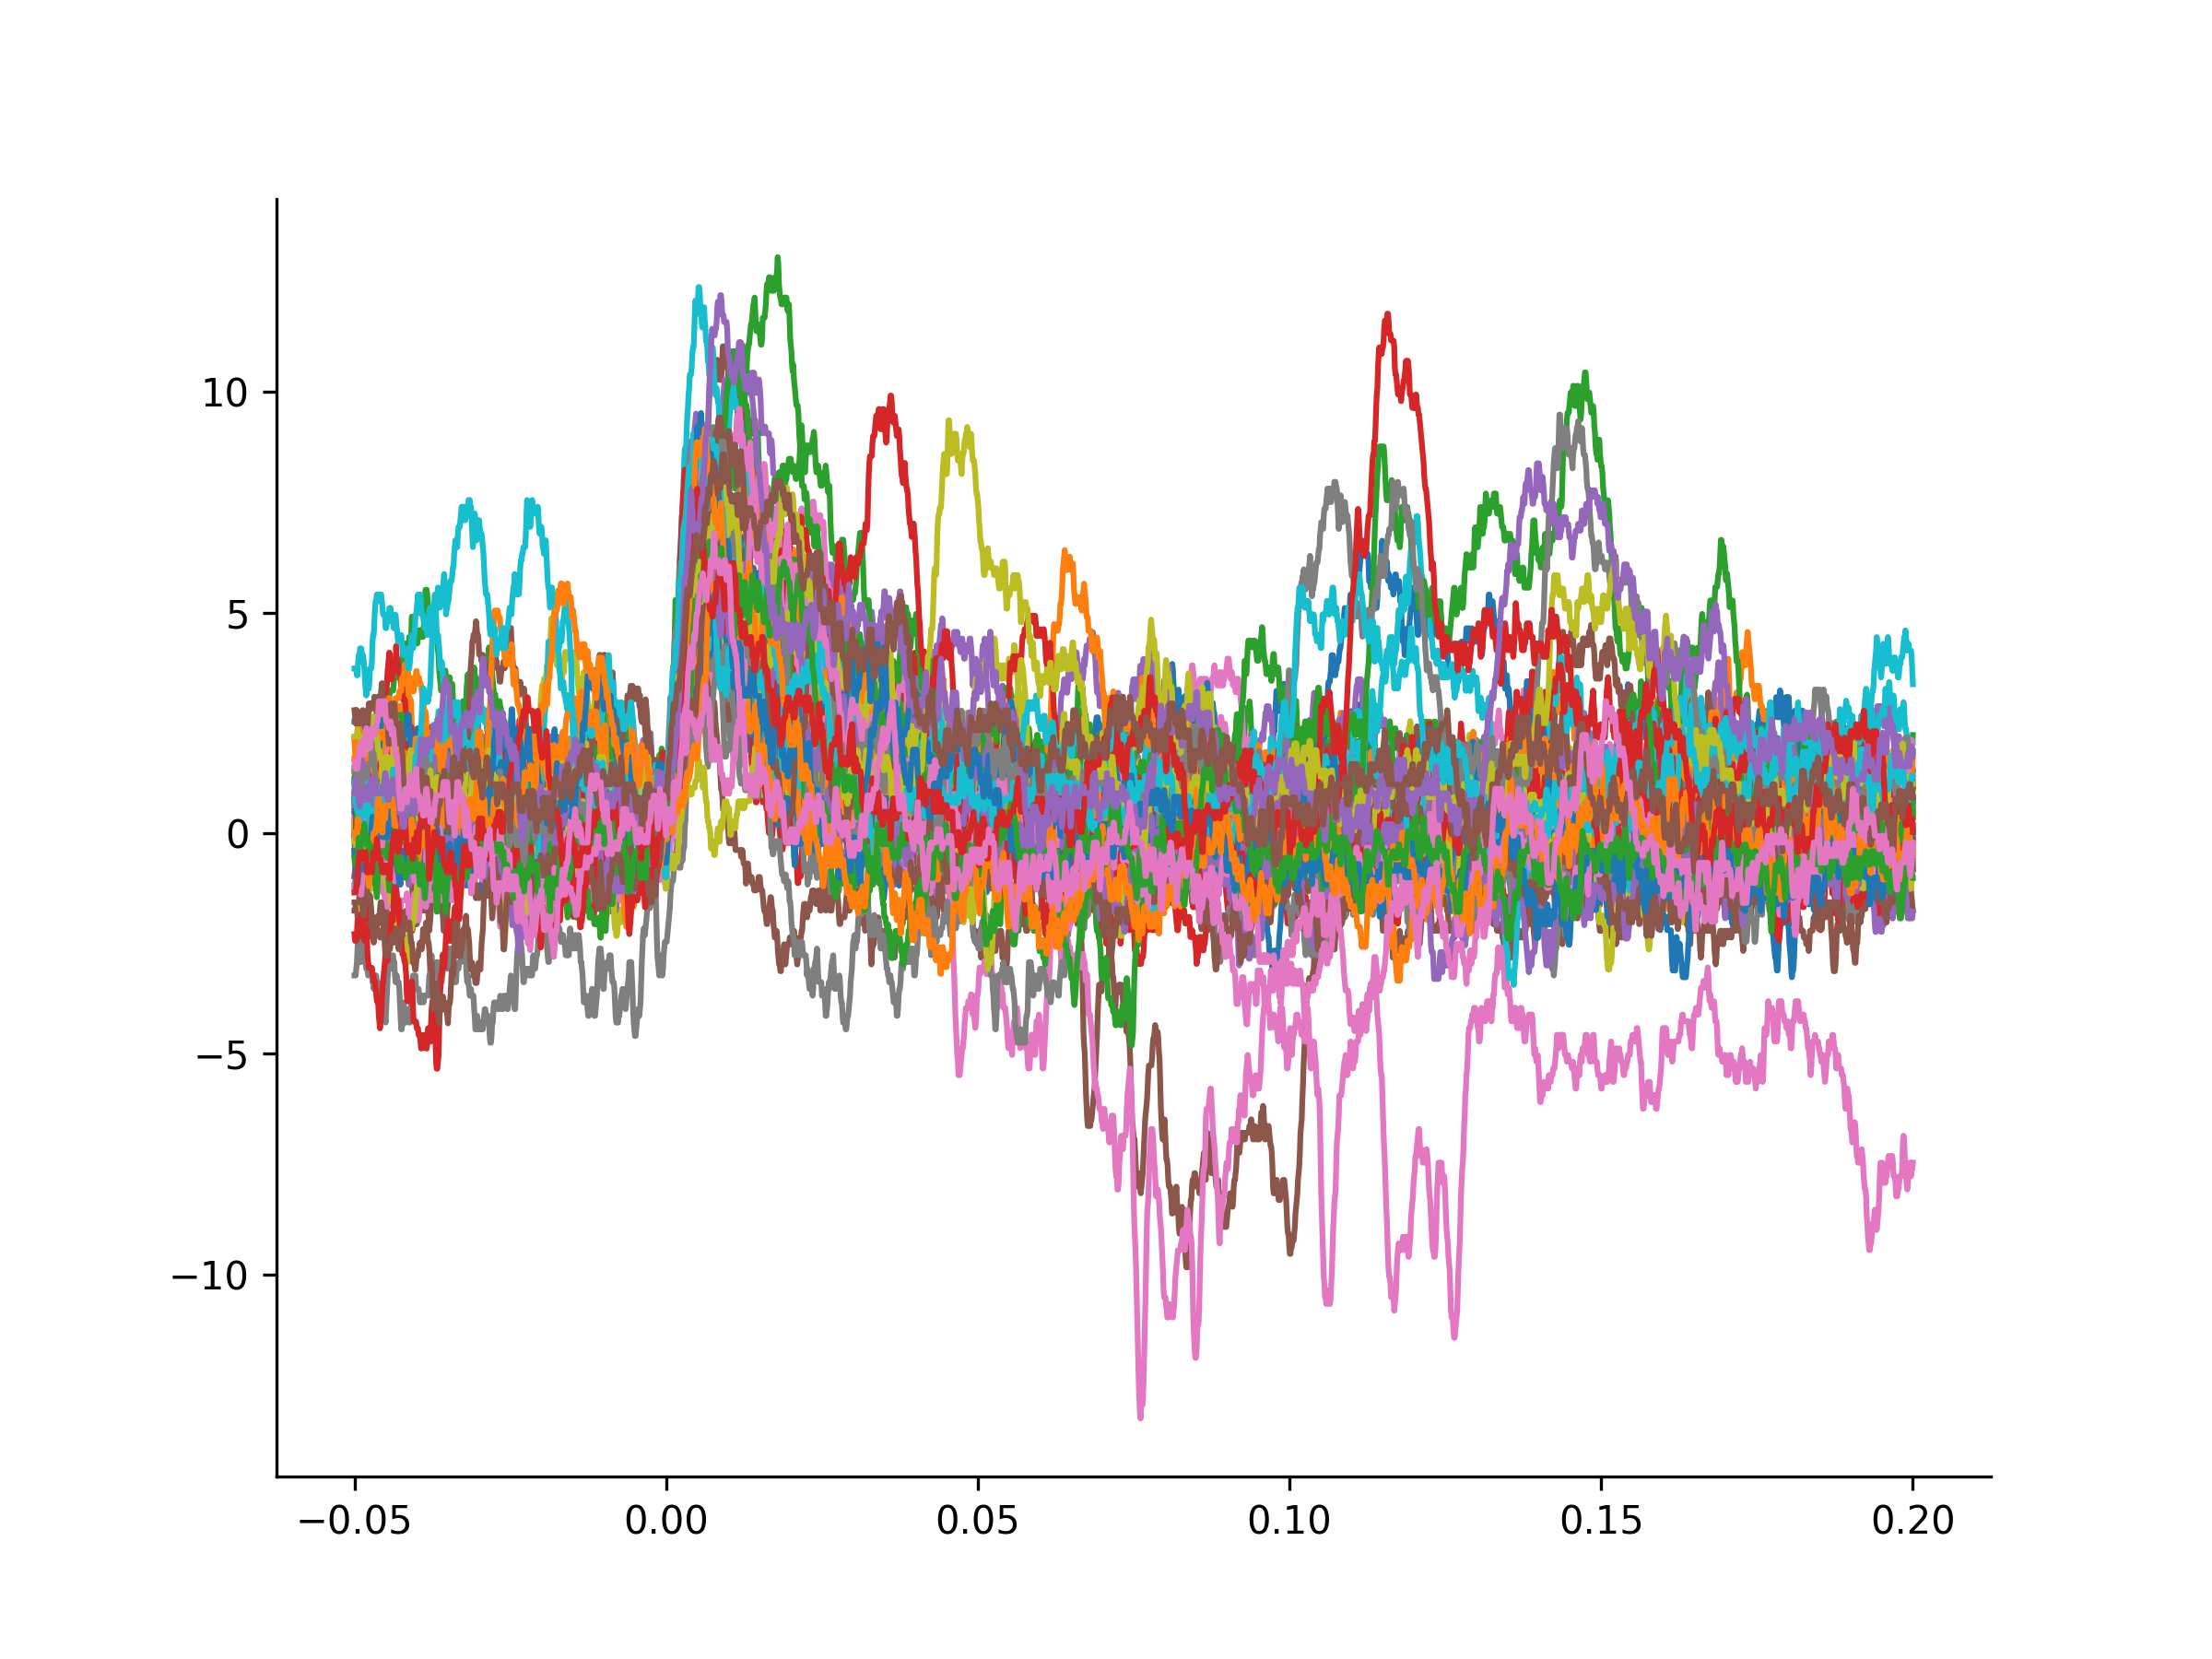

In [9]:
# plot spike clips
ca.plotClips()